# COVID-19 Data analysis & visualization

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from datetime import datetime, date, time, timedelta
from scipy import stats
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
pd.set_option('display.max_columns', 50)

In [2]:
# download the most recent COVID-19 dataset with wget using quite mode, timestamp (to only get the version diferent from local), and output directory
!wget -qNP data https://github.com/owid/covid-19-data/raw/master/public/data/owid-covid-data.xlsx

In [3]:
import platform
from pathlib import Path, PureWindowsPath
# linux path
filename = Path("data/owid-covid-data.xlsx").resolve()
# windows path
if platform.system() == 'Windows':
    filename = PureWindowsPath(filename)

### II. NL

In [4]:
# initial date to start analysis with
begin_date = datetime.strptime('20-02-2020', '%d-%m-%Y')
end_date = date.today()

In [5]:
df = pd.read_excel(filename, engine='openpyxl', index_col="date", parse_dates=True)
df_nl = df.query('iso_code == "NLD"')
df_nl.tail(10)

iso_code continent     location  total_cases  new_cases  \
date                                                                 
2021-02-27      NLD    Europe  Netherlands    1098875.0     4976.0   
2021-02-28      NLD    Europe  Netherlands    1103564.0     4689.0   
2021-03-01      NLD    Europe  Netherlands    1107347.0     3783.0   
2021-03-02      NLD    Europe  Netherlands    1111364.0     4017.0   
2021-03-03      NLD    Europe  Netherlands    1116404.0     5040.0   
2021-03-04      NLD    Europe  Netherlands    1120566.0     4162.0   
2021-03-05      NLD    Europe  Netherlands    1125299.0     4733.0   
2021-03-06      NLD    Europe  Netherlands    1130694.0     5395.0   
2021-03-07      NLD    Europe  Netherlands    1135258.0     4564.0   
2021-03-08      NLD    Europe  Netherlands    1139102.0     3844.0   

            new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
date                                                                            
2021-02-27            4621.857       15668.0        42.0               49.286   
2021-02-28            4620.143       15688.0        20.0               49.714   
2021-03-01            4560.286       15710.0        22.0               48.286   
2021-03-02            4584.571       15775.0        65.0               44.143   
2021-03-03            4674.000       15824.0        49.0               42.143   
2021-03-04            4548.000       15857.0        33.0               42.286   
2021-03-05            4485.714       15890.0        33.0               37.714   
2021-03-06            4545.571       15931.0        41.0               37.571   
2021-03-07            4527.714       15962.0        31.0               39.143   
2021-03-08            4536.429       15990.0        28.0               40.000   

            total_cases_per_million  new_cases_per_million  \
date                                                         
2021-02-27                64130.910                290.402   
2021-02-28                64404.563                273.652   
2021-03-01                64625.340                220.778   
2021-03-02                64859.775                234.434   
2021-03-03                65153.912                294.137   
2021-03-04                65396.808                242.896   
2021-03-05                65673.028                276.220   
2021-03-06                65987.883                314.855   
2021-03-07                66254.241                266.357   
2021-03-08                66478.579                224.338   

            new_cases_smoothed_per_million  total_deaths_per_million  \
date                                                                   
2021-02-27                         269.734                   914.393   
2021-02-28                         269.634                   915.560   
2021-03-01                         266.141                   916.844   
2021-03-02                         267.558                   920.637   
2021-03-03                         272.777                   923.497   
2021-03-04                         265.424                   925.423   
2021-03-05                         261.789                   927.349   
2021-03-06                         265.282                   929.741   
2021-03-07                         264.240                   931.551   
2021-03-08                         264.748                   933.185   

            new_deaths_per_million  new_deaths_smoothed_per_million  \
date                                                                  
2021-02-27                   2.451                            2.876   
2021-02-28                   1.167                            2.901   
2021-03-01                   1.284                            2.818   
2021-03-02                   3.793                            2.576   
2021-03-03                   2.860                            2.459   
2021-03-04                   1.926                            2.468   
2021-03-05         

In [6]:
# start = pd.to_datetime('2020-10-15', format="%Y-%m-%d")
# end = pd.to_datetime('today', format="%Y-%m-%d")
# df_nl[start:end]

In [7]:
pd.set_option('display.max_colwidth', -1)
tmnl = pd.read_excel('data/Tijdslijn_Maatregelen_NL.xlsx', engine='openpyxl', parse_dates=True)
tmnl

Datum                                 Beschrijving
0  2020-02-27  Eerste besmetting met COVID-19             
1  2020-03-06  Eerste overlijden als gevolg van COVID-19  
2  2020-03-09  Regering komt met hygiene maatregelen      
3  2020-03-12  Thuisblijven bij klachten                  
4  2020-03-15  Horeca, sportclubs, sauna's, e.d. gesloten 
5  2020-03-16  Alle scholen / kinderdagverblijven gesloten
6  2020-03-23  Start intelligente lockdown                
7  2020-05-11  Basisscholen, kappers, zwembaden open      
8  2020-06-01  Horeca mag weer open (op 1,5 m)            
9  2020-07-01  Evenementen, OV weer toegankelijk          
10 2020-09-01  Begin studiejaar                           
11 2020-10-13  Gedeeltelijke lockdown                     
12 2020-11-03  Extra beperkingen op bezoekers             
13 2020-11-17  Versoepelingen publieke ruimtes            
14 2020-12-01  Mondkapjesplicht (coronawet)               
15 2020-12-14  Harde lockdown                             
16 2021-01-23  Avondklok

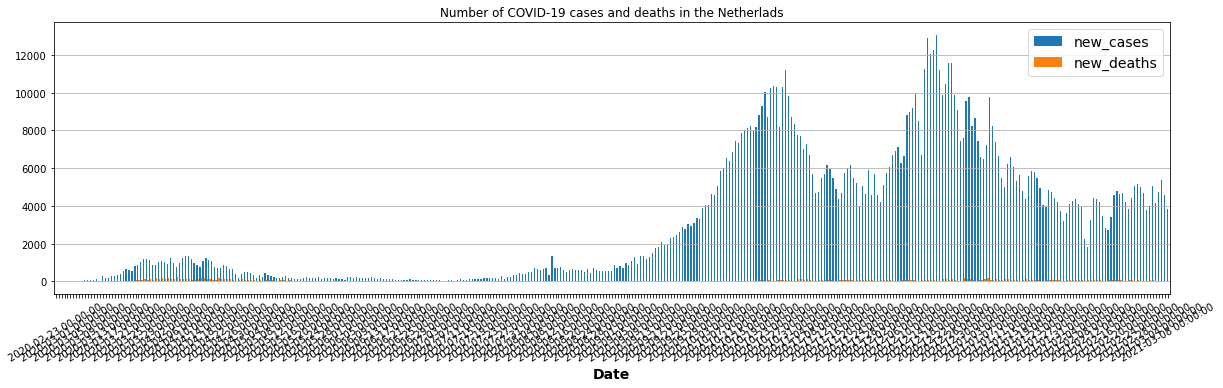

In [8]:
fig, ax = plt.subplots(figsize=(20,5))
df_nl[['new_cases', 'new_deaths']][begin_date.date():].plot(kind='bar', ax=ax, width=0.8, legend=True)
# fewer date ticks
every_nth = 4
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)
plt.title("Number of COVID-19 cases and deaths in the Netherlads")
plt.legend(loc='upper right', prop={'size': 14})
plt.xlabel('Date', fontsize=14, fontweight="bold")
plt.grid(axis='y') 
plt.xticks(rotation=30)
plt.show()

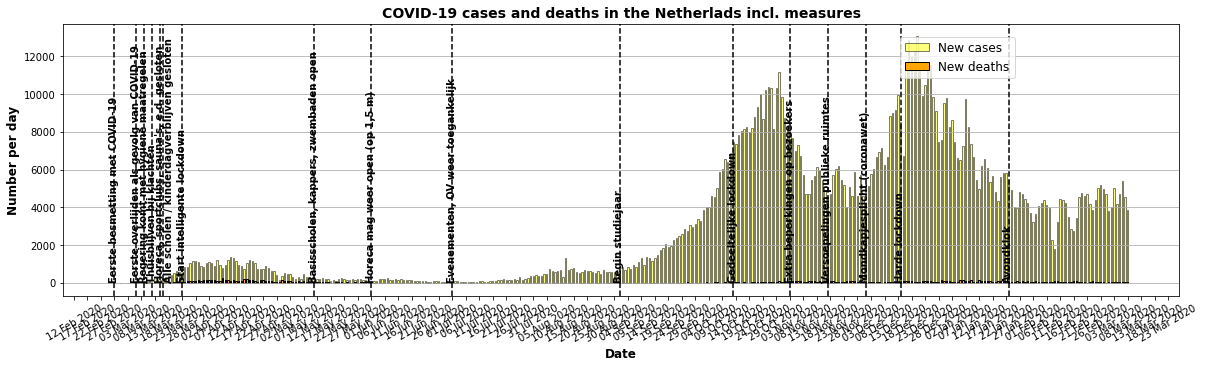

In [9]:
fig, ax = plt.subplots(figsize=(20,5))
ax.bar(df_nl[begin_date.date():].index, df_nl[begin_date.date():]['new_cases'], width=0.5, alpha=0.5, color='yellow', edgecolor='black', align='center', label='New cases')
ax.bar(df_nl[begin_date.date():].index, df_nl[begin_date.date():]['new_deaths'], width=0.5, alpha=1.0, color='orange', edgecolor='black', align='center', label='New deaths')
# add timeline measures in NL 
for date, measure in zip(tmnl.Datum, tmnl.Beschrijving):
    ax.axvline(x=date.date(), ymax=df_nl['new_cases'].max(), color='black', linestyle='--')
    ax.text(date-timedelta(days=2)+(measure == "Alle scholen / kinderdagverblijven gesloten")*timedelta(days=2.5) \
            , 100, measure, color='black', fontsize=10, weight='heavy', rotation=90)
plt.title("COVID-19 cases and deaths in the Netherlads incl. measures", fontsize=14, fontweight="bold")
plt.legend(loc=(0.75, 0.8), prop={'size': 12})
plt.xlabel('Date', fontsize=12, fontweight="bold")
plt.ylabel('Number per day', fontsize=12, fontweight="bold")
ax.xaxis.set_major_locator(mdates.DayLocator(interval=5))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %b 2020'))
plt.xticks(rotation=30)
plt.grid(axis='y') 
if platform.system() == 'Windows':
    filename = "plots\covid-19_nl_incl_maatregelen.pdf"
else:
    filename = "plots/covid-19_nl_incl_maatregelen.pdf"
plt.savefig(filename, papertype = 'a4', orientation = 'portrait', bbox_inches='tight')
plt.show()

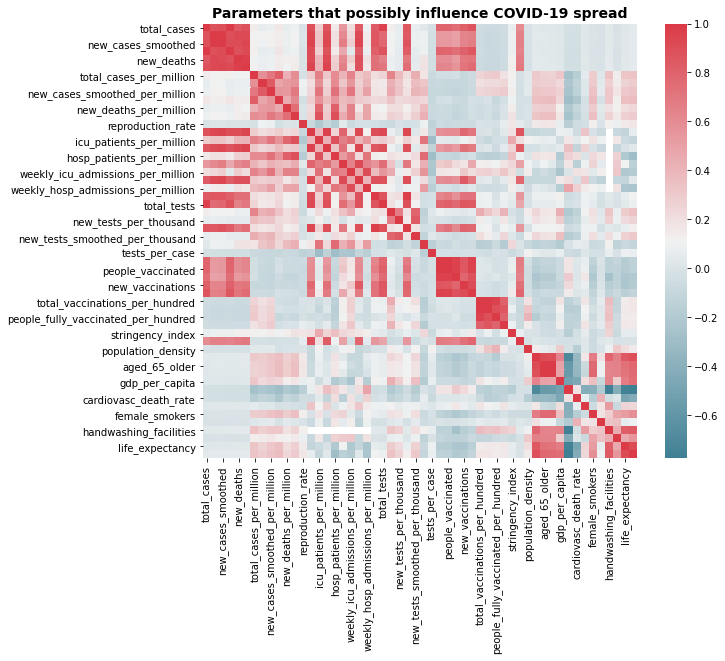

In [10]:
f, ax = plt.subplots(figsize=(10, 8))
corr = df.corr(method='pearson')
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
plt.title("Parameters that possibly influence COVID-19 spread", fontsize=14, fontweight="bold")
if platform.system() == 'Windows':
    filename = "plots\covid-19_parameters.pdf"
else:
    filename = "plots/covid-19_parameters.pdf"
plt.savefig(filename, papertype = 'a4', orientation = 'portrait', bbox_inches='tight')
plt.show()

# Interactive plots

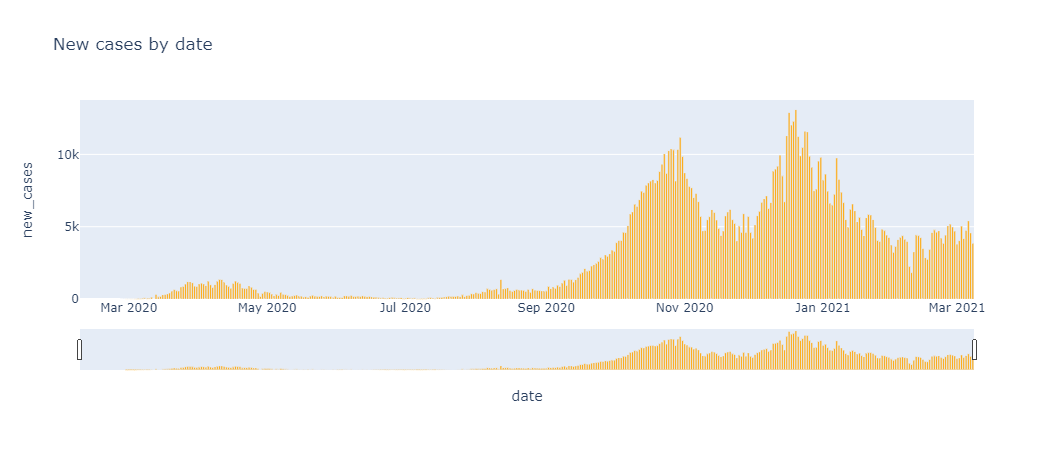

In [11]:
fig = px.bar(df_nl, x = df_nl.index, y = 'new_cases', title='New cases by date')
fig.update_traces(marker_color='orange')
fig.update_xaxes(rangeslider_visible=True)
fig.show()

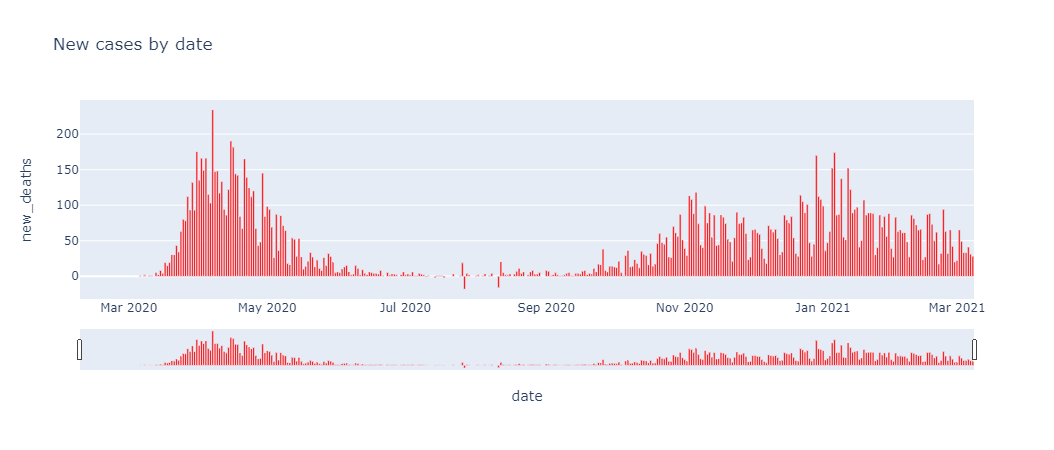

In [12]:
fig = px.bar(df_nl, x = df_nl.index, y = 'new_deaths', title='New cases by date')
fig.update_traces(marker_color='red')
fig.update_xaxes(rangeslider_visible=True)
fig.show()

# RIVM data

In [13]:
!wget -qNP data https://data.rivm.nl/covid-19/COVID-19_aantallen_gemeente_per_dag.csv

In [14]:
# linux path
filename = Path("data/COVID-19_aantallen_gemeente_per_dag.csv").resolve()
# windows path
if platform.system() == 'Windows':
    filename = PureWindowsPath(filename)

df = pd.read_csv(filename, sep=';', parse_dates=[0, 1], infer_datetime_format=True)
#df[df.Municipality_name == 'Amsterdam'].tail()
df.tail()

Date_of_report Date_of_publication Municipality_code  \
142123 2021-03-08 10:00:00 2021-03-08           NaN                
142124 2021-03-08 10:00:00 2021-03-08           NaN                
142125 2021-03-08 10:00:00 2021-03-08           NaN                
142126 2021-03-08 10:00:00 2021-03-08           NaN                
142127 2021-03-08 10:00:00 2021-03-08           NaN                

       Municipality_name       Province Security_region_code  \
142123  NaN               Limburg        VR23                  
142124  NaN               Limburg        VR24                  
142125  NaN               Zuid-Holland   VR15                  
142126  NaN               Fryslân        VR02                  
142127  NaN               Noord-Holland  VR11                  

        Security_region_name  Municipal_health_service  \
142123  Limburg-Noord         GGD Limburg-Noord          
142124  Limburg-Zuid          GGD Zuid-Limburg           
142125  Haaglanden            GGD Haaglanden             
142126  Fryslân               GGD Fryslân                
142127  Zaanstreek-Waterland  GGD Zaanstreek/Waterland   

                              ROAZ_region  Total_reported  Hospital_admission  \
142123  Netwerk Acute Zorg Limburg         3               0                    
142124  Netwerk Acute Zorg Limburg         2               0                    
142125  Netwerk Acute Zorg West            8               0                    
142126  Acute Zorgnetwerk Noord Nederland  1               0                    
142127  NaN                                0               0                    

        Deceased  
142123  0         
142124  0         
142125  0         
142126  0         
142127  0

In [15]:
#np.sort(df.Municipality_name.unique().astype(str))

In [16]:
start = datetime.strptime('1-03-2021', '%d-%m-%Y')
df[df.Municipality_name == 'Amsterdam'][df.Date_of_publication >= start].groupby(['Date_of_publication', 'Municipality_name'])['Total_reported'].sum()

Date_of_publication  Municipality_name
2021-03-01           Amsterdam            182
2021-03-02           Amsterdam            95 
2021-03-03           Amsterdam            333
2021-03-04           Amsterdam            132
2021-03-05           Amsterdam            221
2021-03-06           Amsterdam            299
2021-03-07           Amsterdam            256
2021-03-08           Amsterdam            159
Name: Total_reported, dtype: int64

In [17]:
start = pd.to_datetime('2021-02-01', format="%Y-%m-%d")

(
 df[df.Municipality_name.notnull()][df.Date_of_publication >= start]  
 .groupby(['Date_of_publication', 'Municipality_name'])
 ['Total_reported'].sum()
 .reset_index()
 .groupby('Date_of_publication').apply(lambda x: x.nlargest(3, 'Total_reported')).reset_index(drop=True)
)

Date_of_publication Municipality_name  Total_reported
0   2021-02-01           Amsterdam         116           
1   2021-02-01           Rotterdam         109           
2   2021-02-01           's-Gravenhage     71            
3   2021-02-02           Rotterdam         149           
4   2021-02-02           Amsterdam         131           
..         ...                 ...         ...           
103 2021-03-07           Rotterdam         176           
104 2021-03-07           's-Gravenhage     111           
105 2021-03-08           Rotterdam         164           
106 2021-03-08           Amsterdam         159           
107 2021-03-08           's-Gravenhage     87            

[108 rows x 3 columns]

In [18]:
gemeenten = ["Amsterdam", "Rotterdam", "'s-Gravenhage", "Utrecht"]
#features = ['Total_reported', 'Hospital_admission', 'Deceased']
features = 'Total_reported'
df_sum = df[df.Municipality_name.isin(gemeenten)].groupby(['Date_of_publication', 'Municipality_name'])[features].sum().unstack()
df_sum.tail(10)

Municipality_name    's-Gravenhage  Amsterdam  Rotterdam  Utrecht
Date_of_publication                                              
2021-02-27           107            252        171        52     
2021-02-28           116            157        177        55     
2021-03-01           100            182        169        42     
2021-03-02           80             95         168        56     
2021-03-03           118            333        192        68     
2021-03-04           114            132        218        73     
2021-03-05           131            221        146        75     
2021-03-06           155            299        217        64     
2021-03-07           111            256        176        72     
2021-03-08           87             159        164        63

In [19]:
check_date = datetime.strptime('01-10-2020', '%d-%m-%Y')

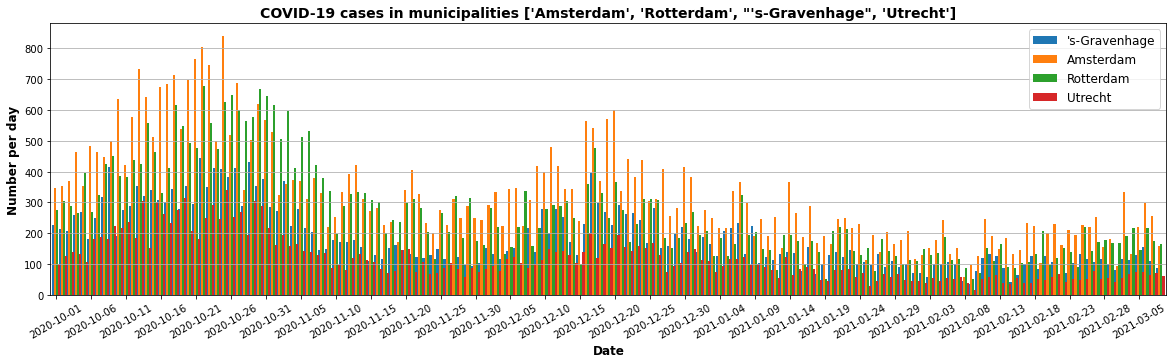

In [20]:
ax = df_sum[check_date.date():].plot.bar(figsize=(20,5), width=1.2)
plt.title(f"COVID-19 cases in municipalities {gemeenten}", fontsize=14, fontweight="bold")
plt.legend(loc='best', prop={'size': 12})
plt.xlabel('Date', fontsize=12, fontweight="bold")
plt.ylabel('Number per day', fontsize=12, fontweight="bold")
ax.set_xticks(range(0,len(df_sum[check_date.date():]), 5));
ax.set_xticklabels(["%s" % item for item in df_sum[check_date.date():].index.get_level_values(0).date.tolist()[::5]], rotation=30);
plt.grid(axis='y') 
plt.show()

In [21]:
# ax = df_sum.query('Date_of_publication > @begin_date').plot.bar(figsize=(20,5), width=1.2)
# plt.title(f"COVID-19 cases in municipality {gemeente}", fontsize=14, fontweight="bold")
# plt.legend(loc='best', prop={'size': 12})
# plt.xlabel('Date', fontsize=12, fontweight="bold")
# plt.ylabel('Number per day', fontsize=12, fontweight="bold")
# ax.set_xticks(range(0,len(df_sum), 5));
# ax.set_xticklabels(["%s" % item for item in df_sum.index.get_level_values(0).date.tolist()[::5]], rotation=30);
# plt.grid(axis='y') 
# plt.show()

In [22]:
!wget -qNP data https://data.rivm.nl/covid-19/COVID-19_casus_landelijk.csv

In [23]:
# linux path
filename = Path('data/COVID-19_casus_landelijk.csv').resolve()
# windows path
if platform.system() == 'Windows':
    filename = PureWindowsPath(filename)

df_case = pd.read_csv(filename, sep=';', parse_dates=[0, 1], infer_datetime_format=True)
df_case.head()

Date_file Date_statistics Date_statistics_type Agegroup     Sex  \
0 2021-03-08 10:00:00 2020-01-01       DOO                  40-49    Female   
1 2021-03-08 10:00:00 2020-01-01       DOO                  50-59    Male     
2 2021-03-08 10:00:00 2020-01-01       DOO                  20-29    Female   
3 2021-03-08 10:00:00 2020-01-01       DOO                  60-69    Female   
4 2021-03-08 10:00:00 2020-01-04       DOO                  10-19    Female   

        Province Hospital_admission Deceased  Week_of_death  \
0  Noord-Holland  No                 No      NaN              
1  Gelderland     No                 No      NaN              
2  Zuid-Holland   No                 No      NaN              
3  Noord-Holland  No                 No      NaN              
4  Gelderland     Unknown            No      NaN              

                             Municipal_health_service  
0  GGD Amsterdam                                       
1  Veiligheids- en Gezondheidsregio Gelderland-Midden  
2  GGD Hollands-Midden                                 
3  GGD Hollands-Noorden                                
4  GGD Gelderland-Zuid

<AxesSubplot:xlabel='Sex,Agegroup'>

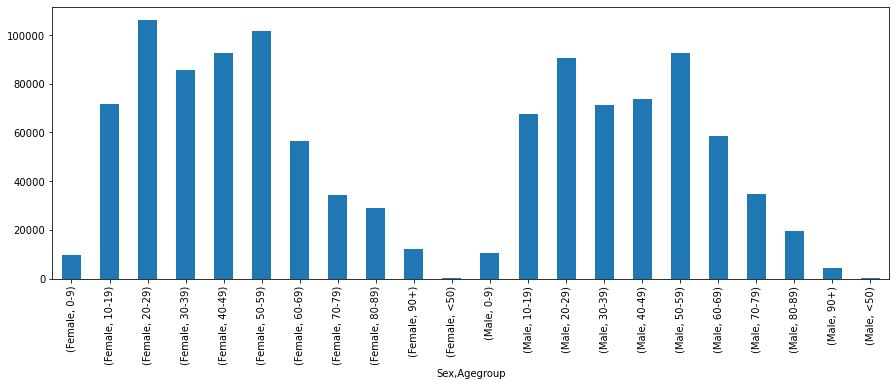

In [24]:
df_case[df_case.Sex.isin(['Male', 'Female'])][df_case.Agegroup != 'Unknown'].groupby(['Sex', 'Agegroup']).size().plot.bar(figsize=(15,5))

In [25]:
# from scipy.stats import ttest_ind
# ttest_ind(df_case[df_case.Sex == 'Male']['Hospital_admission'].values, df_case[df_case.Sex == 'Female']['Hospital_admission'].values)

In [26]:
# import seaborn as sns


# g = sns.catplot(x = "Agegroup", # x variable name
#             y = "Hospital_admission",       # y variable name
#             hue = "Sex",  # group variable name
#             data = df_case[df_case.Sex.isin(['Male', 'Female'])][df_case.Agegroup != 'Unknown'],     # dataframe to plot
#             kind = "bar")
# g.despine(left=True)
# g.set_axis_labels("Gender", "Count")
# g.legend.set_title("")

# Predictive modelling

### II. NL (forecasting with sktime)

In [27]:
df_nl.describe()

total_cases     new_cases  new_cases_smoothed  total_deaths  \
count  3.760000e+02  376.000000    371.000000          368.000000     
mean   3.138019e+05  3029.526596   3033.750865         7519.114130    
std    3.731726e+05  3294.357412   3254.690956         3941.544138    
min    1.000000e+00  0.000000      3.429000            1.000000       
25%    4.659875e+04  230.750000    236.857000          6028.500000    
50%    7.423100e+04  1169.500000   1052.857000         6276.000000    
75%    5.547090e+05  5178.750000   5325.928500         9772.500000    
max    1.139102e+06  13072.000000  11804.000000        15990.000000   

       new_deaths  new_deaths_smoothed  total_cases_per_million  \
count  368.000000  371.000000           376.000000                
mean   43.451087   42.829790            18313.638316              
std    45.150946   40.236388            21778.544911              
min   -18.000000  -1.286000             0.058000                  
25%    4.000000    4.000000             2719.526750               
50%    29.000000   39.143000            4332.159500               
75%    71.250000   67.643000            32373.102750              
max    234.000000  154.286000           66478.579000              

       new_cases_per_million  new_cases_smoothed_per_million  \
count  376.000000             371.000000                       
mean   176.804731             177.051261                       
std    192.260407             189.945442                       
min    0.000000               0.200000                         
25%    13.467000              13.823500                        
50%    68.253000              61.445000                        
75%    302.234250             310.823500                       
max    762.889000             688.888000                       

       total_deaths_per_million  new_deaths_per_million  \
count  368.000000                368.000000               
mean   438.819378                2.535807                 
std    230.030574                2.635037                 
min    0.058000                 -1.050000                 
25%    351.826500                0.233000                 
50%    366.270500                1.692000                 
75%    570.328500                4.158500                 
max    933.185000                13.656000                

       new_deaths_smoothed_per_million  reproduction_rate  icu_patients  \
count  371.000000                       366.000000         366.000000     
mean   2.499563                         1.123743           395.882514     
std    2.348255                         0.381719           357.742924     
min   -0.075000                         0.640000           7.000000       
25%    0.233000                         0.860000           42.250000      
50%    2.284000                         1.040000           424.500000     
75%    3.948000                         1.320000           602.000000     
max    9.004000                         2.650000           1424.000000    

       icu_patients_per_million  hosp_patients  hosp_patients_per_million  \
count  366.000000                364.000000     364.000000                  
mean   23.103926                 1039.458791    60.663354                   
std    20.878052                 813.799713     47.493780                   
min    0.409000                  1.000000       0.058000                    
25%    2.465750                  177.000000     10.329750                   
50%    24.774000                 1144.500000    66.793500                   
75%    35.133000                 1631.500000    95.215250                   
max    83.105000                 3284.000000    191.656000                  

       weekly_icu_admissions  weekly_icu_admissions_per_million  \
count  52.000000              52.000000                           
mean   153.196404             8.940596                            
std    155.028868             9.047624                            
min    2.953000  

In [28]:
print("% of nan values per column")
for column in df_nl.columns:
    print(f"{column}: {df_nl[column].isna().sum()} / {len(df_nl)}")

% of nan values per column
iso_code: 0 / 379
continent: 0 / 379
location: 0 / 379
total_cases: 3 / 379
new_cases: 3 / 379
new_cases_smoothed: 8 / 379
total_deaths: 11 / 379
new_deaths: 11 / 379
new_deaths_smoothed: 8 / 379
total_cases_per_million: 3 / 379
new_cases_per_million: 3 / 379
new_cases_smoothed_per_million: 8 / 379
total_deaths_per_million: 11 / 379
new_deaths_per_million: 11 / 379
new_deaths_smoothed_per_million: 8 / 379
reproduction_rate: 13 / 379
icu_patients: 13 / 379
icu_patients_per_million: 13 / 379
hosp_patients: 15 / 379
hosp_patients_per_million: 15 / 379
weekly_icu_admissions: 327 / 379
weekly_icu_admissions_per_million: 327 / 379
weekly_hosp_admissions: 326 / 379
weekly_hosp_admissions_per_million: 326 / 379
new_tests: 379 / 379
total_tests: 328 / 379
total_tests_per_thousand: 328 / 379
new_tests_per_thousand: 379 / 379
new_tests_smoothed: 35 / 379
new_tests_smoothed_per_thousand: 35 / 379
positive_rate: 328 / 379
tests_per_case: 328 / 379
tests_units: 28 / 379
to

In [29]:
data = df_nl.drop(['iso_code', 'continent', 'location', 'new_tests', 'new_tests_per_thousand', 'total_tests', 'total_tests_per_thousand', 'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'tests_units', 'extreme_poverty', 'handwashing_facilities'], axis=1)

In [30]:
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.performance_metrics.forecasting import smape_loss
from sktime.utils.plotting.forecasting import plot_ys

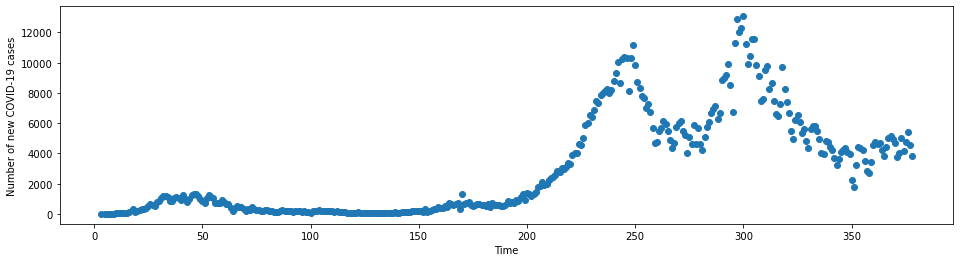

In [31]:
y = df_nl.reset_index()['new_cases']
y = y[y>0]
fig, ax = plot_ys(y)
ax.set(xlabel="Time", ylabel="Number of new COVID-19 cases");

354 20


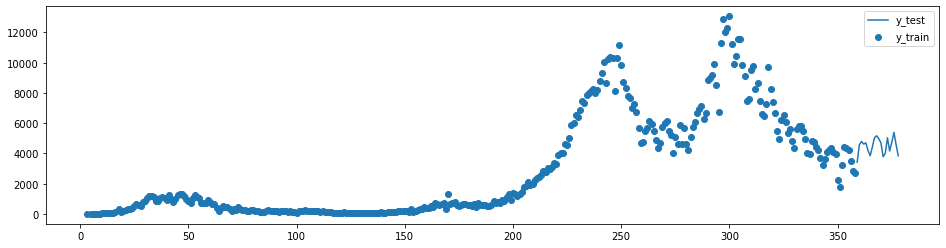

In [32]:
y_train, y_test = temporal_train_test_split(y, test_size=20)
plot_ys(y_train, y_test, labels=["y_train", "y_test"])
print(y_train.shape[0], y_test.shape[0])

In [33]:
fh = np.arange(len(y_test)) + 1

0.21972126690066623

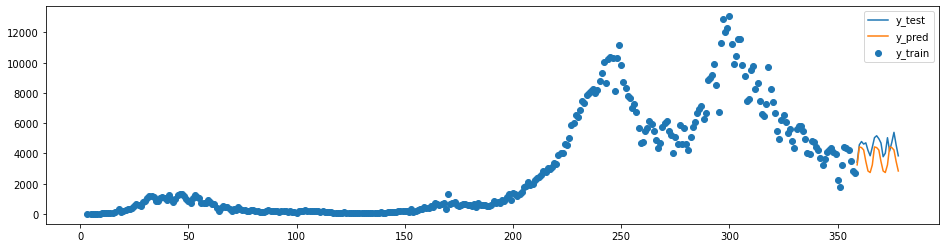

In [34]:
from sktime.forecasting.compose import ReducedRegressionForecaster
from sklearn.neighbors import KNeighborsRegressor

regressor = KNeighborsRegressor(n_neighbors=1)
forecaster = ReducedRegressionForecaster(regressor=regressor, window_length=12, strategy="recursive")
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
plot_ys(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"]);
smape_loss(y_test, y_pred)

In [37]:
from sktime.forecasting.model_selection import SlidingWindowSplitter, ForecastingGridSearchCV

forecaster = ReducedRegressionForecaster(regressor=regressor, window_length=15, strategy="recursive")
param_grid = {"window_length": [5, 10, 15]}

# we fit the forecaster on the initial window, and then use temporal cross-validation to find the optimal parameter
cv = SlidingWindowSplitter(initial_window=int(len(y_train) * 0.5))
gscv = ForecastingGridSearchCV(forecaster, cv=cv, param_grid=param_grid)
gscv.fit(y_train)
y_pred = gscv.predict(fh)

0.23428361613075874

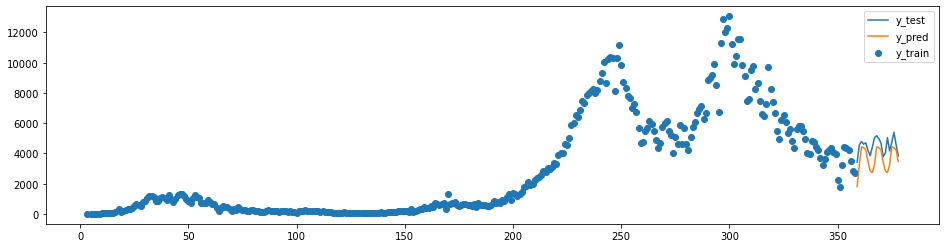

In [38]:
plot_ys(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"]);
smape_loss(y_test, y_pred)

In [39]:
gscv.best_params_

{'window_length': 10}

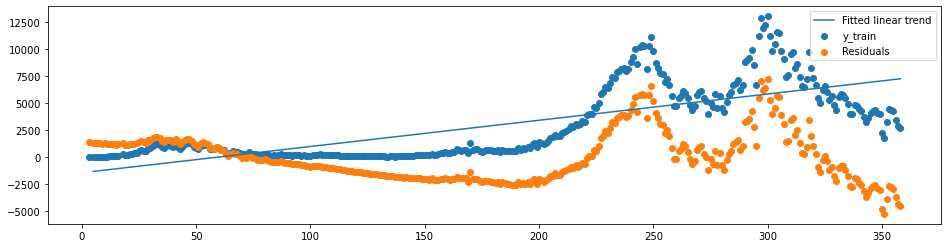

In [40]:
from sktime.forecasting.trend import PolynomialTrendForecaster
from sktime.transformers.single_series.detrend import Detrender

# liner detrending
forecaster = PolynomialTrendForecaster(degree=1)
transformer = Detrender(forecaster=forecaster)
yt = transformer.fit_transform(y_train)

# internally, the Detrender uses the in-sample predictions of the PolynomialTrendForecaster
forecaster = PolynomialTrendForecaster(degree=1)
fh_ins = -np.arange(len(y_train)) # in-sample forecasting horizon
y_pred = forecaster.fit(y_train).predict(fh=fh_ins)

plot_ys(y_train, y_pred, yt, labels=["y_train", "Fitted linear trend", "Residuals"]);

In [41]:
from sktime.forecasting.naive import NaiveForecaster
forecaster = NaiveForecaster(strategy="last")
forecaster.fit(y_train)
cv = SlidingWindowSplitter(fh=1)
y_pred = forecaster.update_predict(y_test, cv)
smape_loss(y_test, y_pred)

0.12446457794264953

(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:>)

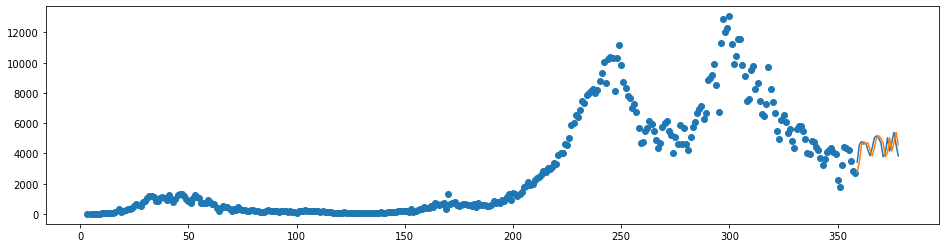

In [42]:
plot_ys(y_train, y_test, y_pred)

# Prediction with Prophet 

In [43]:
from fbprophet import Prophet

In [44]:
X = (
    df_nl[pd.to_datetime('2021-01-23', format="%Y-%m-%d"):]
    ['new_cases']
    .reset_index()
    .rename(columns = {'date':'ds', 'new_cases': 'y'})
)

In [52]:
m = Prophet()
m.fit(X)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [46]:
future = m.make_future_dataframe(periods=5)
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds         yhat   yhat_lower   yhat_upper
45 2021-03-09  3561.925155  2860.328670  4255.193165
46 2021-03-10  4399.109825  3723.668204  5051.396909
47 2021-03-11  4761.505331  4090.022105  5507.224634
48 2021-03-12  4872.606131  4176.257633  5552.834031
49 2021-03-13  4980.049323  4326.865044  5709.624151

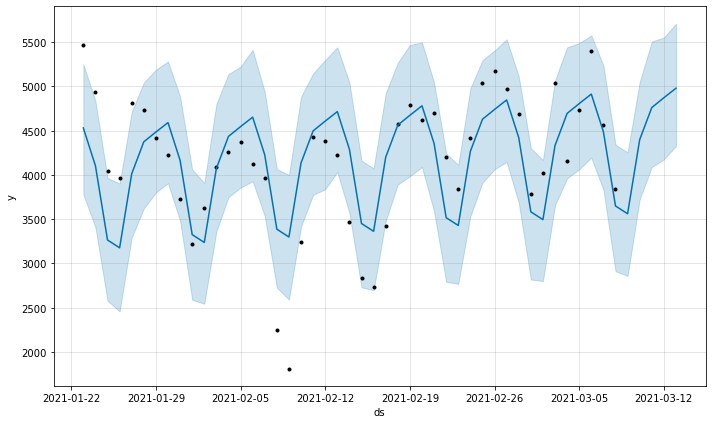

In [47]:
fig1 = m.plot(forecast)

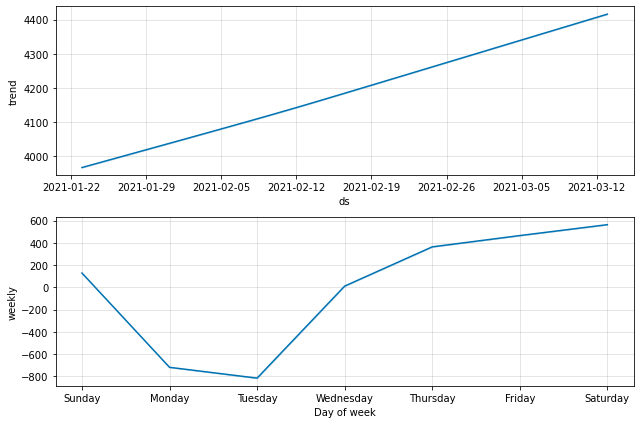

In [48]:
fig2 = m.plot_components(forecast)

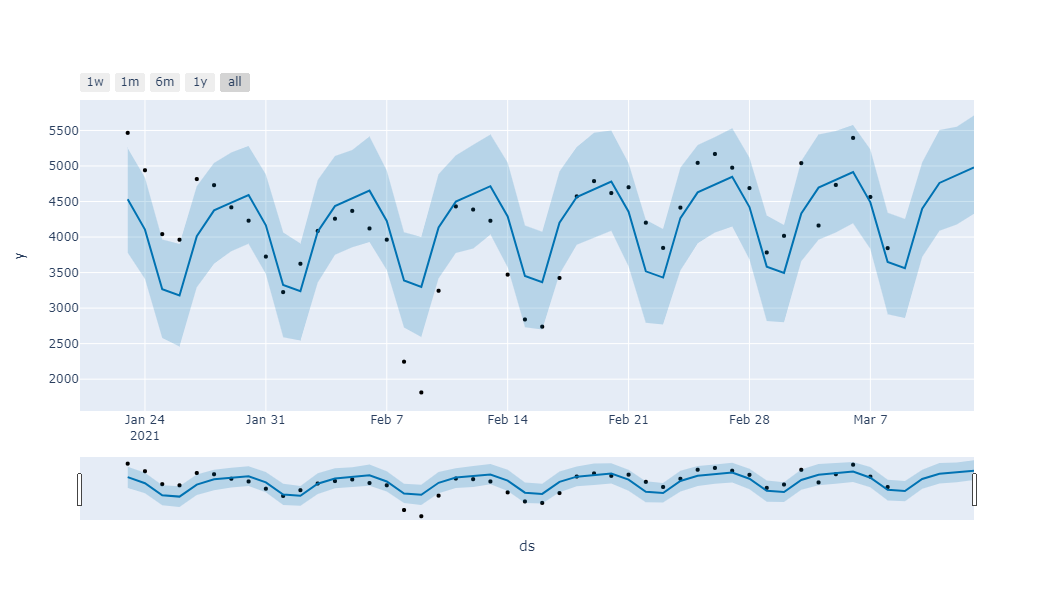

In [49]:
from fbprophet.plot import plot_plotly, plot_components_plotly
plot_plotly(m, forecast)

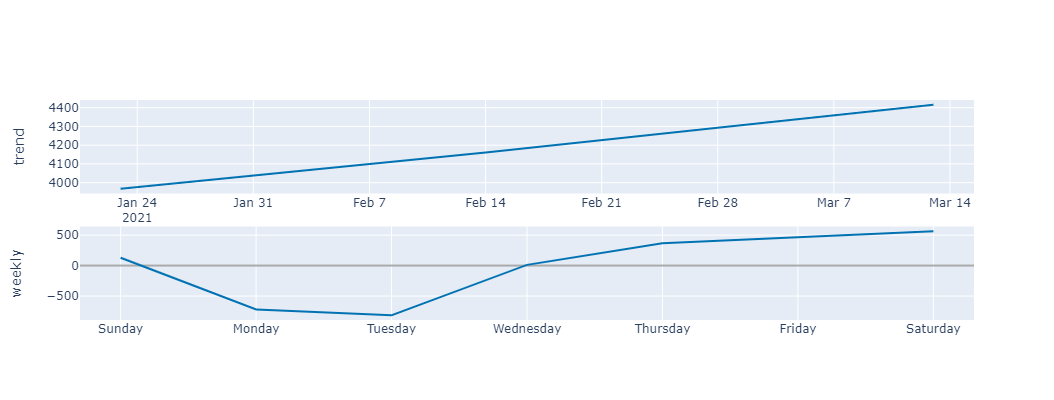

In [50]:
plot_components_plotly(m, forecast)